<center>

# EDA - LOS ANGELES CRIME

</center>

## Import libraries

In [53]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

## Import data

In [54]:
total_data = pd.read_csv("../data/interim/eda_data.csv")

## Exploration and data cleaning

In [55]:
total_data.head(5)

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon
0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,2020-02-13,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [56]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433936 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      433936 non-null  object 
 1   time_occ      433936 non-null  int64  
 2   area_name     433936 non-null  object 
 3   rpt_dist_no   433936 non-null  int64  
 4   crm_cd_desc   433936 non-null  object 
 5   mocodes       374863 non-null  object 
 6   vict_age      433936 non-null  int64  
 7   vict_sex      377464 non-null  object 
 8   vict_descent  377461 non-null  object 
 9   premis_desc   433651 non-null  object 
 10  weapon_desc   154873 non-null  object 
 11  status_desc   433936 non-null  object 
 12  location      433936 non-null  object 
 13  lat           433936 non-null  float64
 14  lon           433936 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 49.7+ MB


-Before the descriptive analysis, there are a total of 433.936 rows.

-Some of the variables have null values: mocodes, vict_sex, vict_descent and weapon_desc.

-The data has: 4 numerical characteristics, 9 categorical characteristics and 2 datetime characteristics (which need to be converted to datetime format).

In [57]:
total_data.describe()

,time_occ,rpt_dist_no,vict_age,lat,lon
count,433936.000000,433936.000000,433936.000000,433936.000000,433936.000000
mean,1342.261801,807.326440,29.243091,33.978735,-118.063061
std,653.305824,582.410313,21.737410,1.613498,5.594830
min,1.000000,101.000000,0.000000,0.000000,-118.667600
25%,900.000000,327.000000,0.000000,34.023400,-118.376600
50%,1427.000000,644.000000,30.000000,34.051200,-118.296000
75%,1900.000000,1203.000000,44.000000,34.098100,-118.260900
max,2359.000000,2198.000000,99.000000,34.328900,0.000000


In [58]:
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"]).dt.date
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"])

In [59]:
total_data.columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon'],
      dtype='object')

## Analysis of univariate variables

### Categoric variables

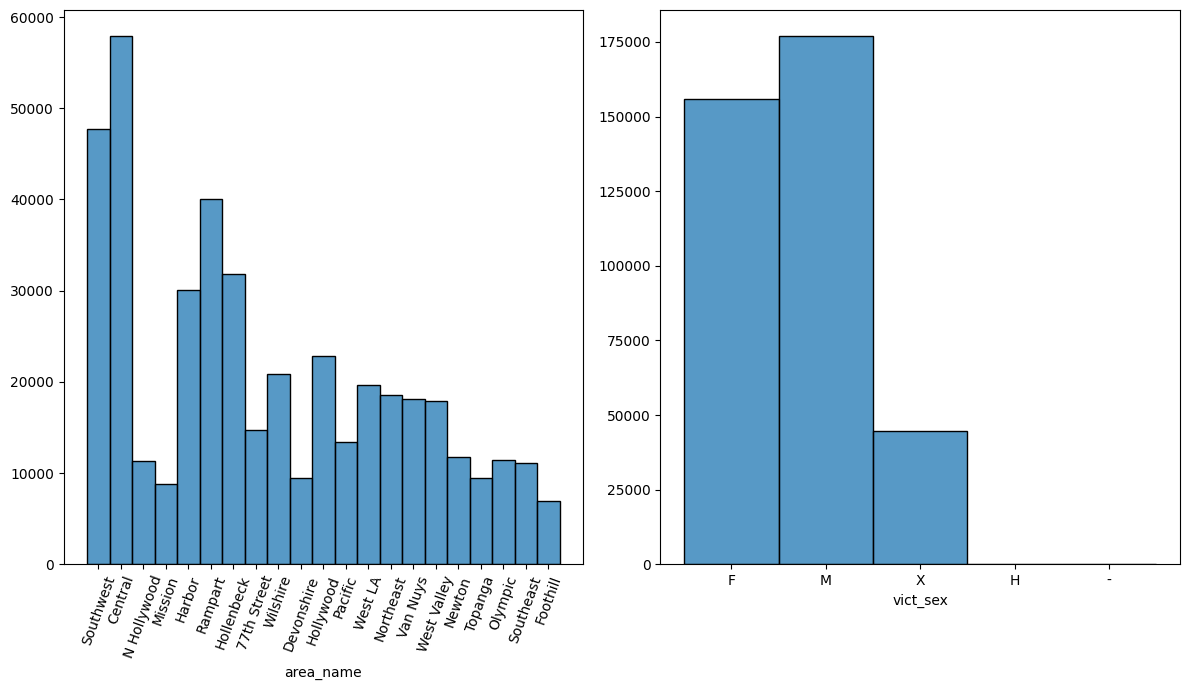

In [60]:
fig, axis = plt.subplots(1,2, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "area_name").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)

sns.histplot(ax = axis[1], data = total_data, x = "vict_sex").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

En estos graficos podemos observar:

1) El area donde hay mayor casos de crimen es Central seguido de Southwest, con una diferencia aprox de 10 mil casos.

2) El sexo de la victima con mas casos de crimen es el masculino sin embargo tenemos varios casos sin identificar el sexo de la victima.

3) Hay valores en el sexo de la victima que debemos tratar como "H" y "-" que valoramos como errores al momento de generar los reportes de crimen.



In [61]:
total_data['vict_sex'].isnull().sum()

56472

In [62]:
total_data['vict_sex'].value_counts()

vict_sex
M    176863
F    155883
X     44679
H        38
-         1
Name: count, dtype: int64

In [63]:
total_data = total_data[total_data['vict_sex'].isin(["M", "F", "X"]) | total_data['vict_sex'].isnull()]
total_data['vict_sex'].value_counts()

vict_sex
M    176863
F    155883
X     44679
Name: count, dtype: int64

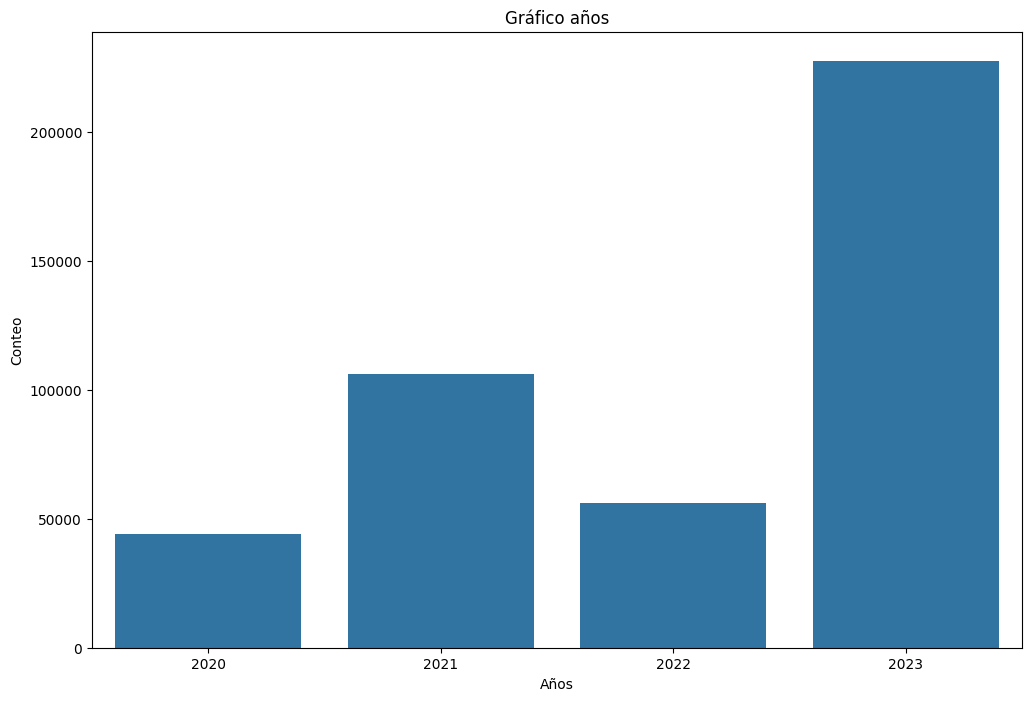

In [64]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=total_data["date_occ"].dt.year.value_counts().index, 
                 y=total_data["date_occ"].dt.year.value_counts())

# Configurar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Conteo')
plt.title('Gráfico años')

# Mostrar el gráfico
plt.show()

En este grafico podemos observar un incremento en los crimenes en el 2023 con respecto a los años anteriores

In [65]:
delitos=total_data.value_counts("crm_cd_desc")[0:20]
delitos=pd.DataFrame(delitos)
delitos.head()

,count
crm_cd_desc,
VEHICLE - STOLEN,45699
BATTERY - SIMPLE ASSAULT,37054
BURGLARY FROM VEHICLE,28201
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",27128
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25645


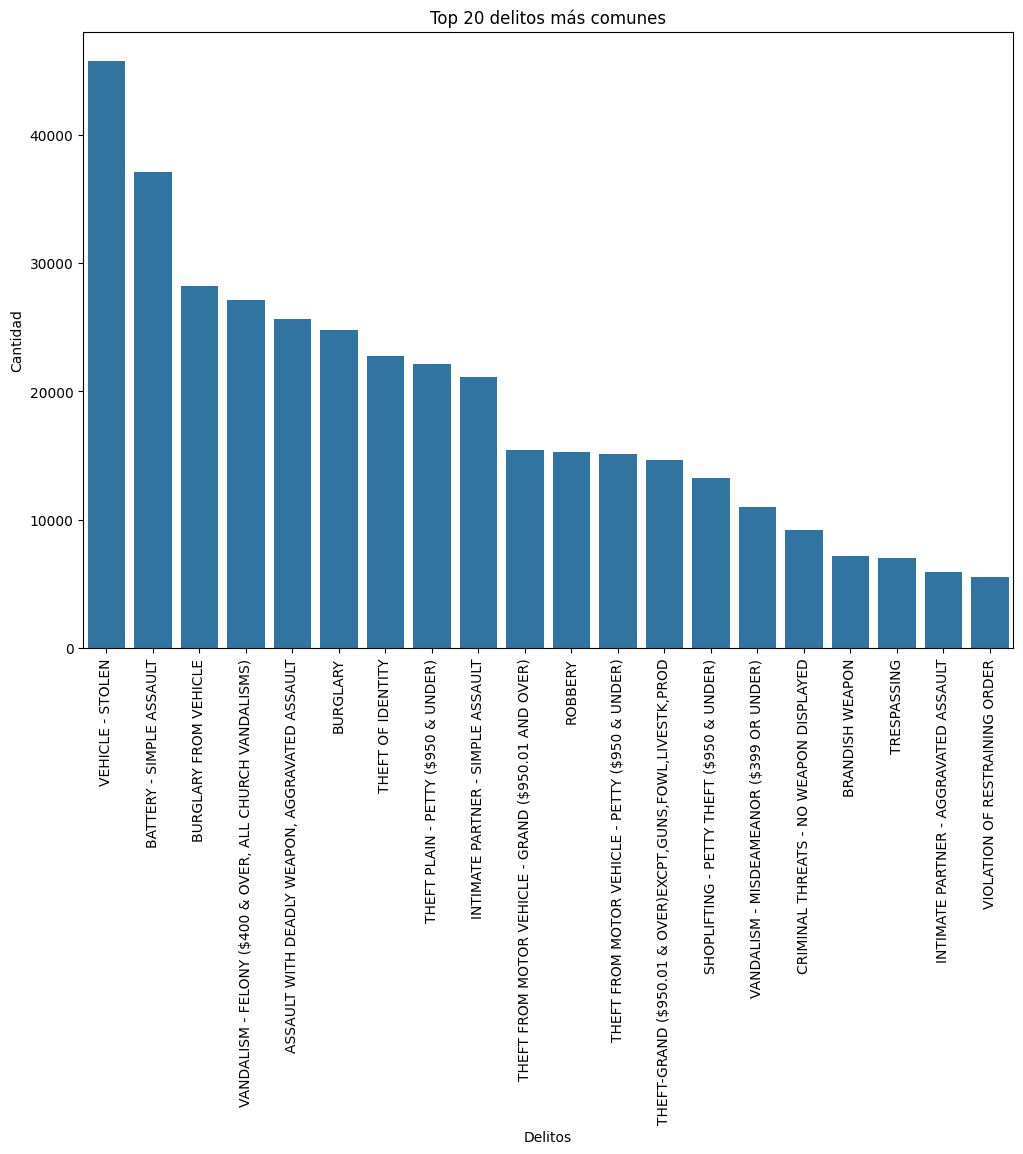

In [66]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=delitos.index, y=delitos['count'], data=delitos)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('Delitos')
plt.ylabel('Cantidad')
plt.title('Top 20 delitos más comunes')

# Mostrar el gráfico
plt.show()

En este grafico podemos observar los crimenes mas recurrentes y podemos observar que los principales son el robo de vehiculos, asalto simple y entrada ilegal a un vehiculo.

In [67]:
hours= pd.to_datetime(total_data["time_occ"].astype(str), format="%H%M", errors="coerce").dt.time
hours = hours.value_counts("time_occ")[0:20]
hours=pd.DataFrame(hours)
hours=hours.sort_index()
hours.head()

,proportion
time_occ,
03:00:00,0.015008
08:00:00,0.015612
09:00:00,0.013964
10:00:00,0.028322
11:00:00,0.015746


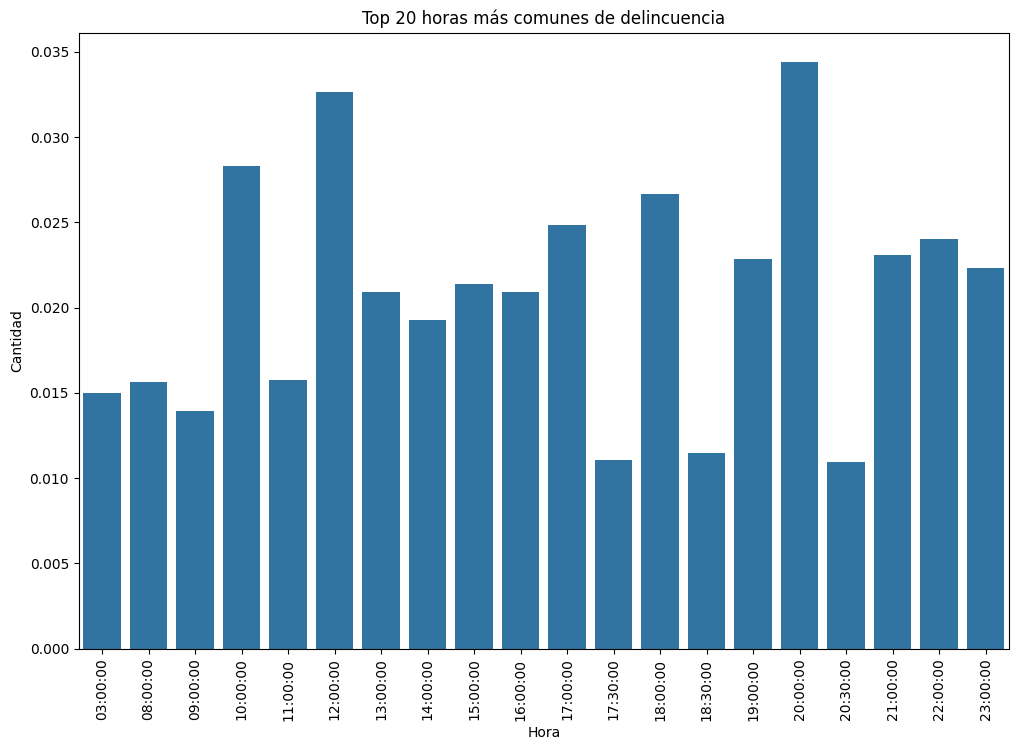

In [68]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=hours.index, y=hours['proportion'], data=hours)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.title('Top 20 horas más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

En este grafico, obversamos las horas mas recurrentes de crimen, principalmente las 20:00, 12:00 y 10:00.

In [69]:
rpt_codes=total_data.value_counts("rpt_dist_no")[0:20]
rpt_codes=pd.DataFrame(rpt_codes)
rpt_codes.head()

,count
rpt_dist_no,
162,4553
182,4015
111,3294
152,2607
153,2528


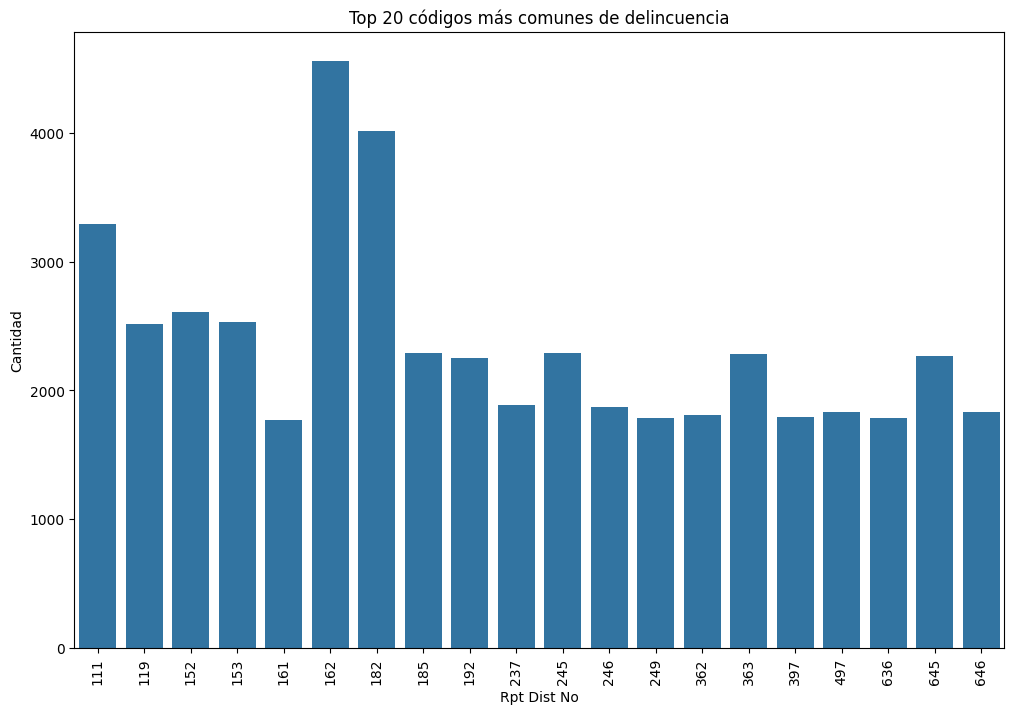

In [70]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=rpt_codes.index, y=rpt_codes['count'], data=rpt_codes)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('Rpt Dist No')
plt.ylabel('Cantidad')
plt.title('Top 20 códigos más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='vict_age'>

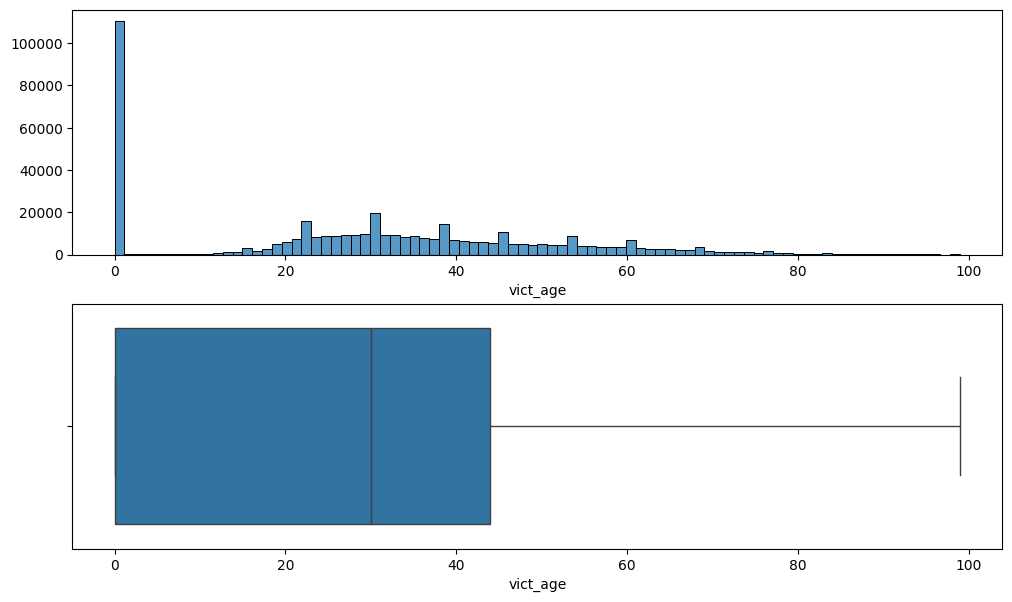

In [71]:
fig, axis = plt.subplots(2,1, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "vict_age").set(ylabel = None) 
sns.boxplot(ax = axis[1], data = total_data, x = "vict_age")

En este grafico podemos observar como estan distribuidas las edades de las victimas respecto a los delitos ocurridos, Sin embargo vemos que tenemos una cantidad de datos donde la victima es 0, lo cual debera ser un error que debemos tratar

<Axes: xlabel='date_occ'>

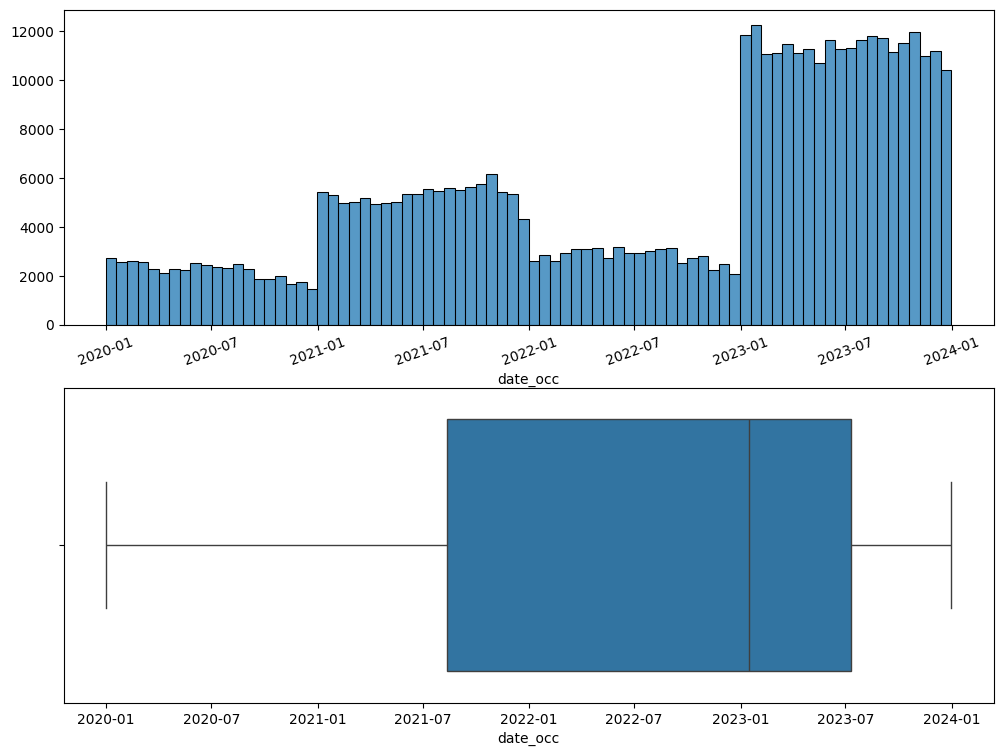

In [72]:
fig, axis = plt.subplots(2,1, figsize = (12, 9))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "date_occ").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=20)
sns.boxplot(ax = axis[1], data = total_data, x = "date_occ")#.set(xlabel = None)

In [73]:
descent=total_data.value_counts("vict_descent")
descent=pd.DataFrame(descent)
descent

,count
vict_descent,
H,134284
W,82134
B,62354
X,48055
O,32125
A,9792
K,2214
C,2175
F,1912


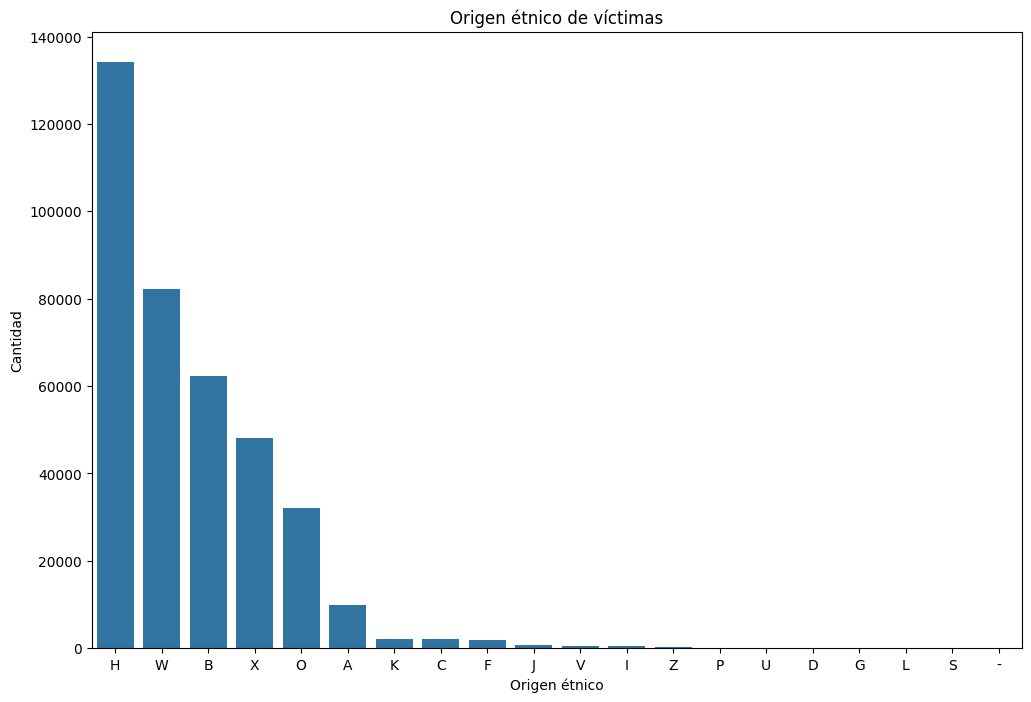

In [74]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=descent.index, y=descent['count'], data=descent)

# Configurar etiquetas y título
plt.xlabel('Origen étnico')
plt.ylabel('Cantidad')
plt.title('Origen étnico de víctimas')

# Mostrar el gráfico
plt.show()

En este grafico podemos observar que el origen etnico mas recurrente en las victimas son los Hispanic/Latin/Mexican seguidos de personas blancas con una diferencia aproximada de 50.000 casos

In [75]:
total_data['vict_descent'].isnull().sum()

56475

In [76]:
total_data['vict_descent'].unique()

array(['B', 'H', 'X', 'W', 'A', 'O', nan, 'C', 'F', 'K', 'I', 'V', 'J',
       'D', 'Z', 'U', 'P', 'G', 'S', 'L', '-'], dtype=object)

In [77]:
total_data = total_data[total_data['vict_descent'].isin(total_data['vict_descent'].unique()[:-1]) | total_data['vict_sex'].isnull()]
total_data['vict_descent'].value_counts()

vict_descent
H    134284
W     82134
B     62354
X     48055
O     32125
A      9792
K      2214
C      2175
F      1912
J       690
V       564
I       515
Z       248
P       133
U        82
D        54
G        34
L        33
S        23
Name: count, dtype: int64

In [78]:
weapon_desc=total_data.value_counts("weapon_desc")[0:20]
weapon_desc=pd.DataFrame(weapon_desc)
weapon_desc.head()

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",82486
UNKNOWN WEAPON/OTHER WEAPON,17572
VERBAL THREAT,11286
HAND GUN,9745
KNIFE WITH BLADE 6INCHES OR LESS,3371


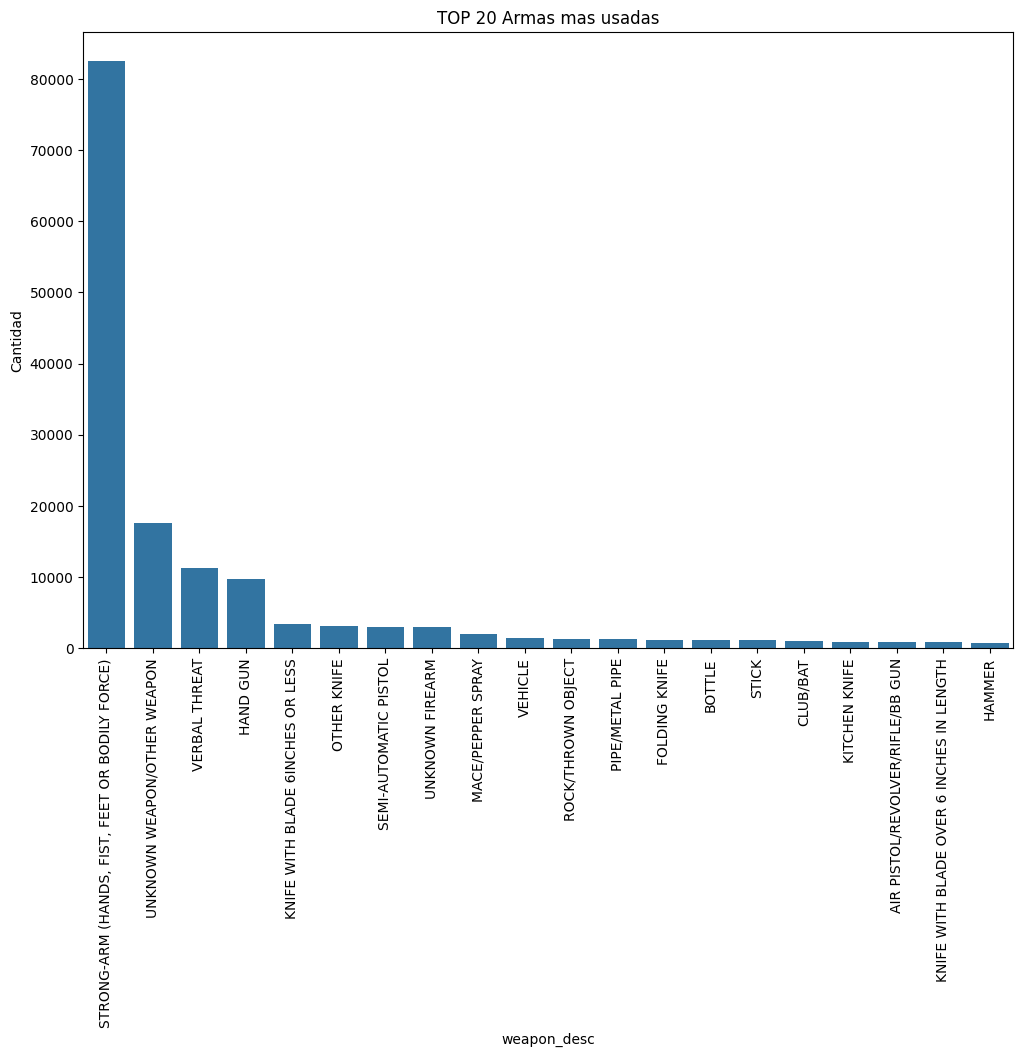

In [79]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=weapon_desc.index, y=weapon_desc['count'], data=weapon_desc)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('weapon_desc')
plt.ylabel('Cantidad')
plt.title('TOP 20 Armas mas usadas')

# Mostrar el gráfico
plt.show()

In [80]:
is_weapon=total_data["weapon_desc"].isnull().value_counts()
is_weapon

weapon_desc
True     279036
False    154860
Name: count, dtype: int64

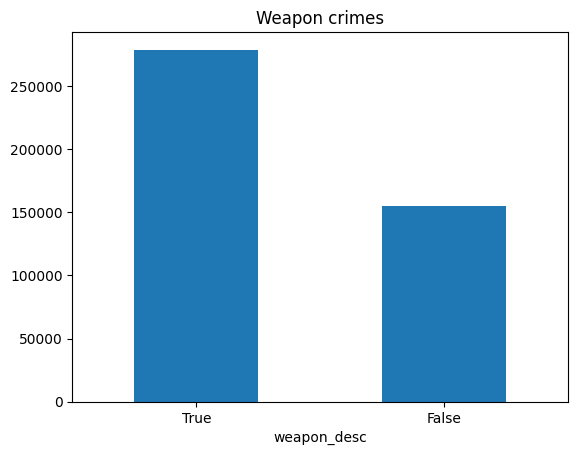

In [81]:
is_weapon.plot(kind='bar',rot=0, title='Weapon crimes')
plt.show()

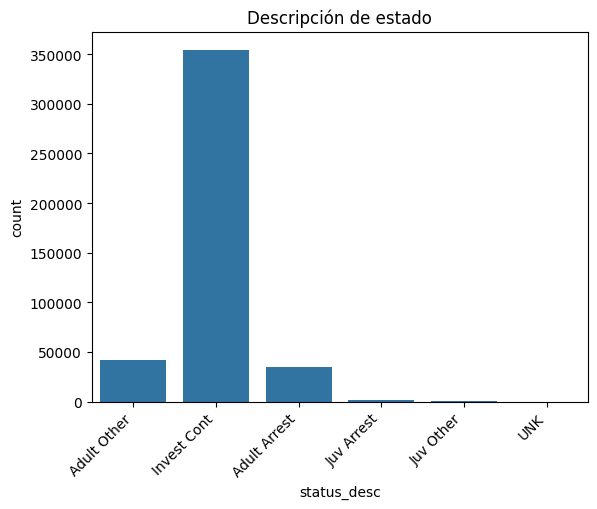

In [82]:
sns.countplot(x='status_desc', data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('Descripción de estado')
plt.show()

In [83]:
location = total_data.value_counts("location")[0:50]
location = pd.DataFrame(location)
location.head()


,count
location,
800 N ALAMEDA ST,1623
7TH,1247
6TH ST,1228
7TH ST,1178
6TH,1175


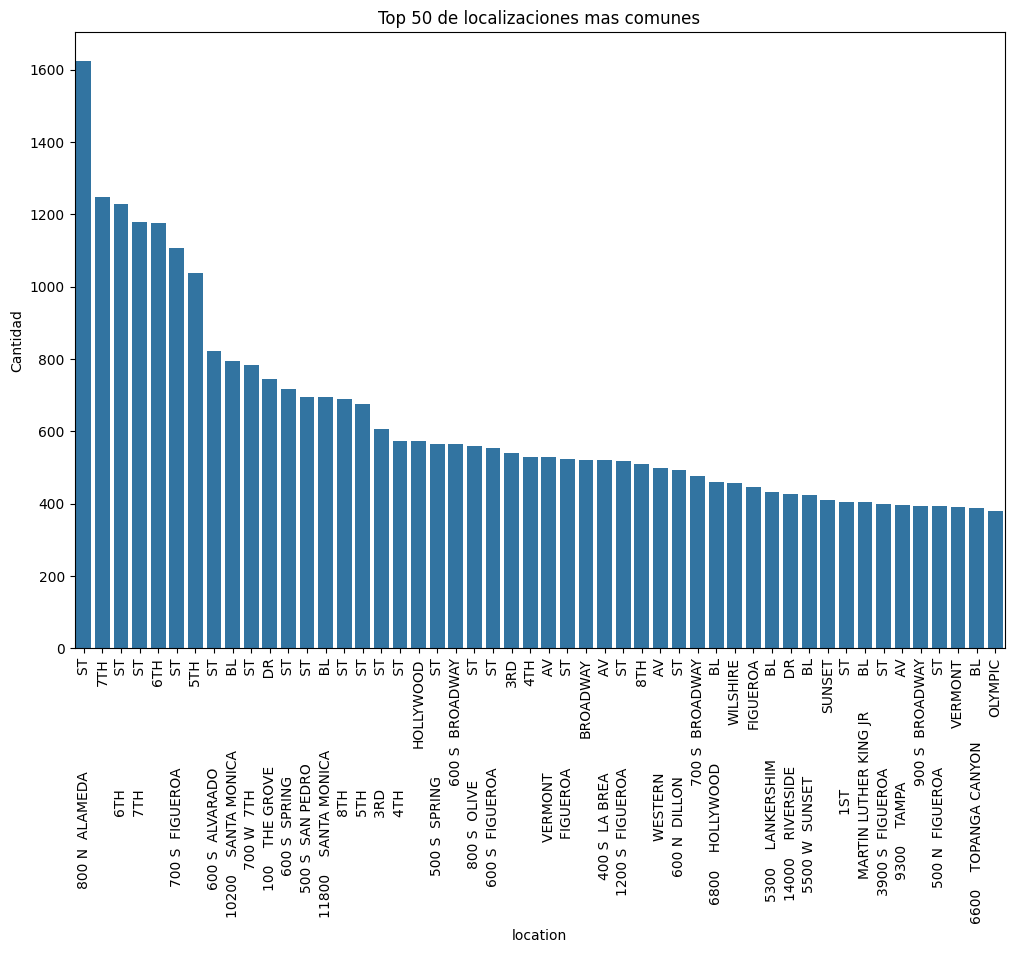

In [84]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=location.index, y=location['count'], data=location)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('location')
plt.ylabel('Cantidad')
plt.title("Top 50 de localizaciones mas comunes")

# Mostrar el gráfico
plt.show()

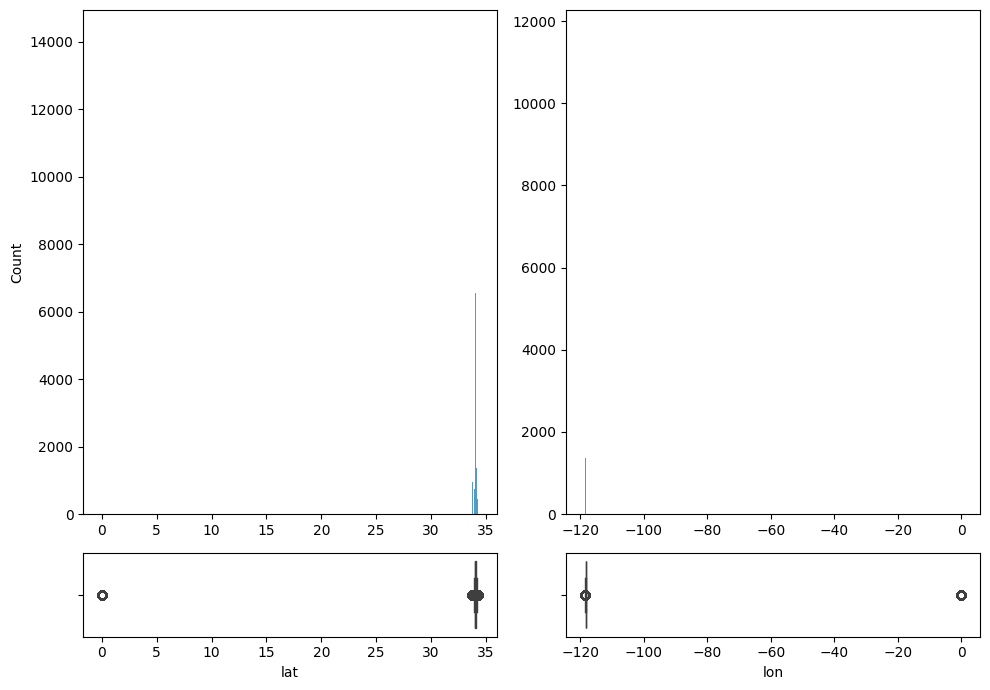

In [85]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "lat").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "lat")
sns.histplot(ax = axis[0, 1], data = total_data, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "lon")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

En estos graficos podemos observar valores a 0 que deben representar errores y debemos tratar

In [86]:
len(total_data.loc[total_data["lat"] == 0])

972

In [87]:
len(total_data.loc[(total_data["lat"] == 0) & (total_data["lon"] == 0)])

972

In [88]:
# Borrar lat y lon 0
total_data.drop(total_data.loc[(total_data["lat"] == 0) & (total_data["lon"] == 0)].index, axis=0, inplace= True)

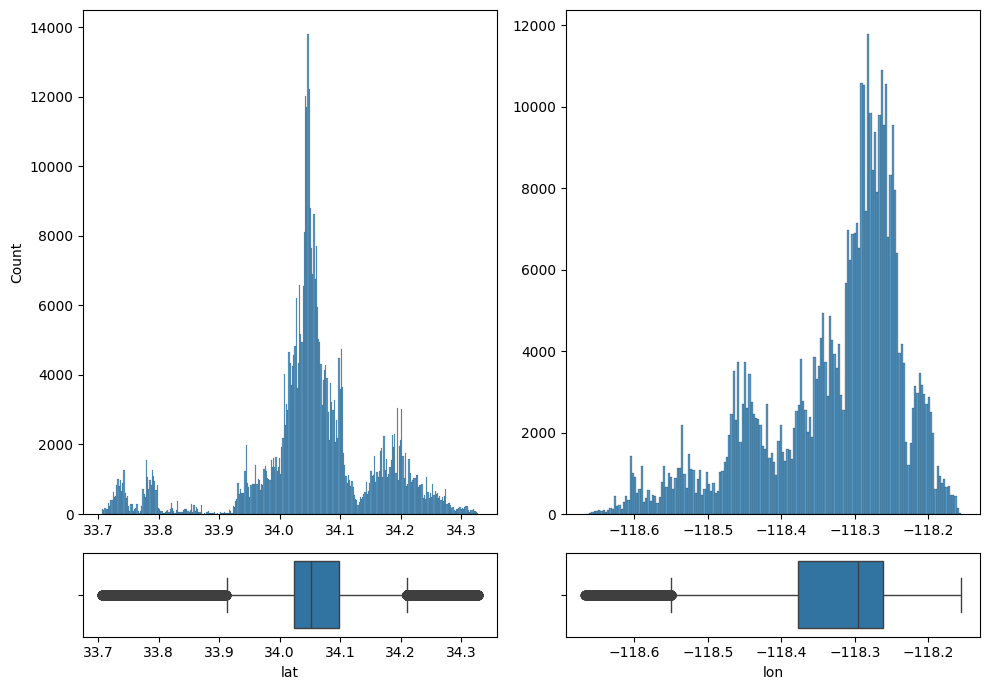

In [89]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})
# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "lat").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "lat")
sns.histplot(ax = axis[0, 1], data = total_data, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "lon")
# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()

In [90]:
total_data['mocodes']=total_data['mocodes'].str.split(" ")

In [91]:
frecuencias = total_data['mocodes'].apply(pd.Series).stack().value_counts()
frecuencias=frecuencias[0:20]

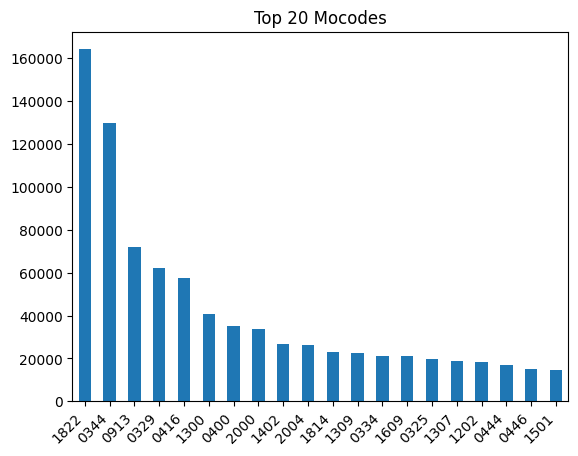

In [92]:
frecuencias.plot(kind='bar',rot=0, title='Top 20 Mocodes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [93]:
len(total_data[total_data["mocodes"].isna()])

59047

In [94]:
total_data.dropna(subset = "mocodes", axis = 0, inplace= True, ignore_index= True)

In [95]:
total_data["weekday"] = total_data["date_occ"].apply(lambda x:x.strftime("%A"))
total_data["month"] = total_data["date_occ"].apply(lambda x:x.strftime("%B"))

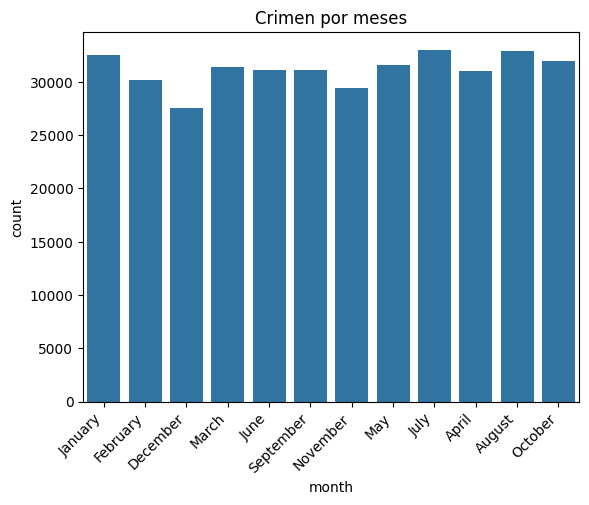

In [96]:
sns.countplot(x="month", data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('Crimen por meses')
plt.show()

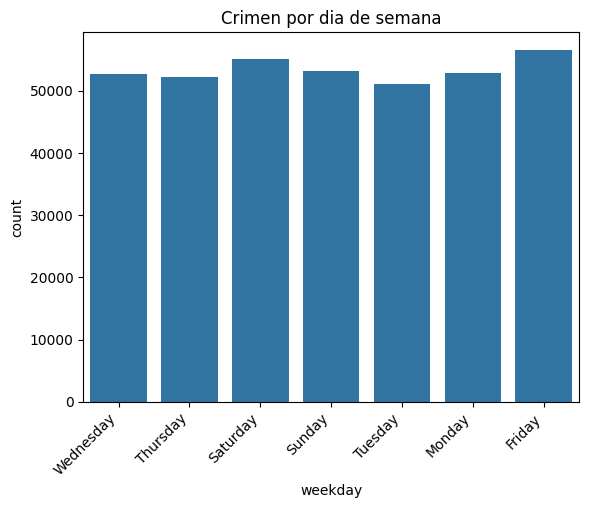

In [97]:
sns.countplot(x="weekday", data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('Crimen por dia de semana')
plt.show()

## Analysis of multivariate variables

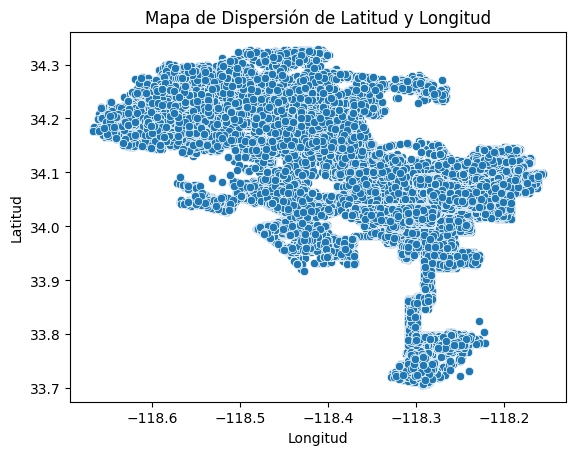

In [98]:
sns.scatterplot(x=total_data['lon'], y=total_data['lat'], data=total_data)
plt.title('Mapa de Dispersión de Latitud y Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

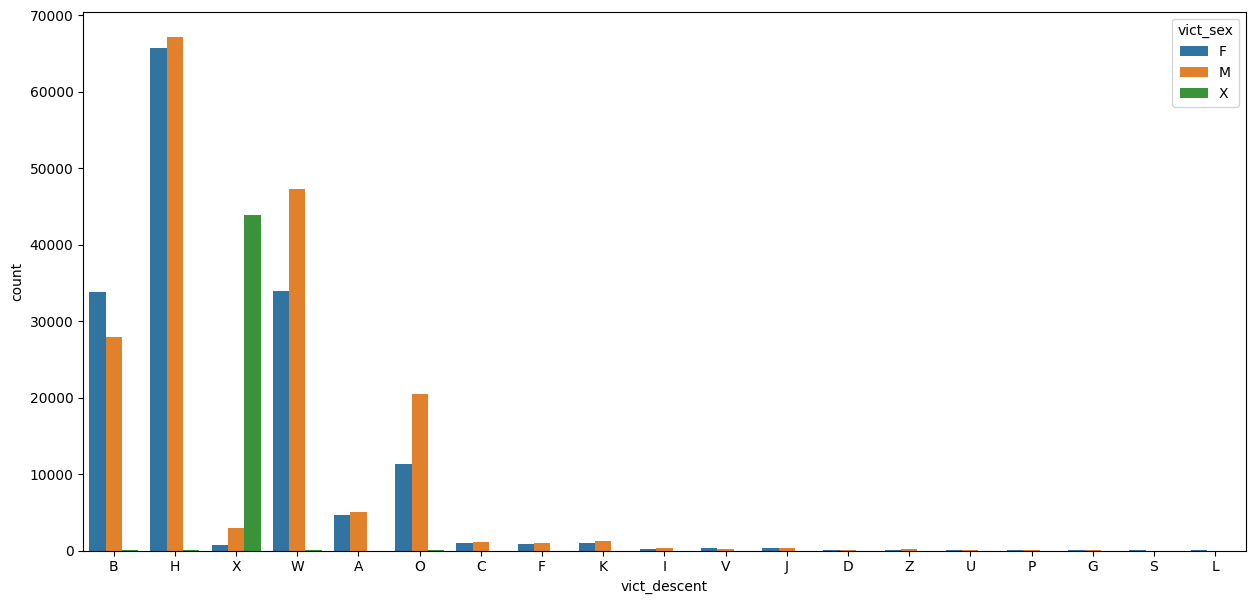

In [99]:
plt.figure(figsize=(15, 7))

# Create a multiple scatter diagram
sns.countplot(data = total_data, x ="vict_descent" , hue = "vict_sex")

# Show the plot
plt.show()

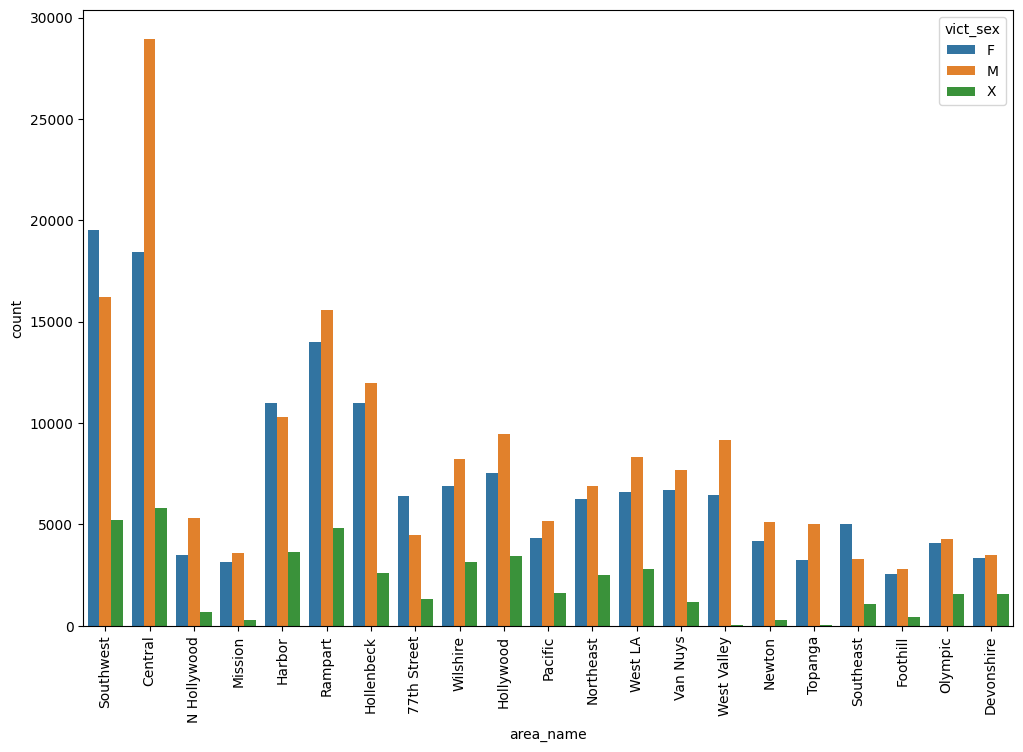

In [100]:
plt.figure(figsize=(12, 8))
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_sex")
plt.tick_params(axis = "x", labelrotation=90)
# Show the plot
plt.show()

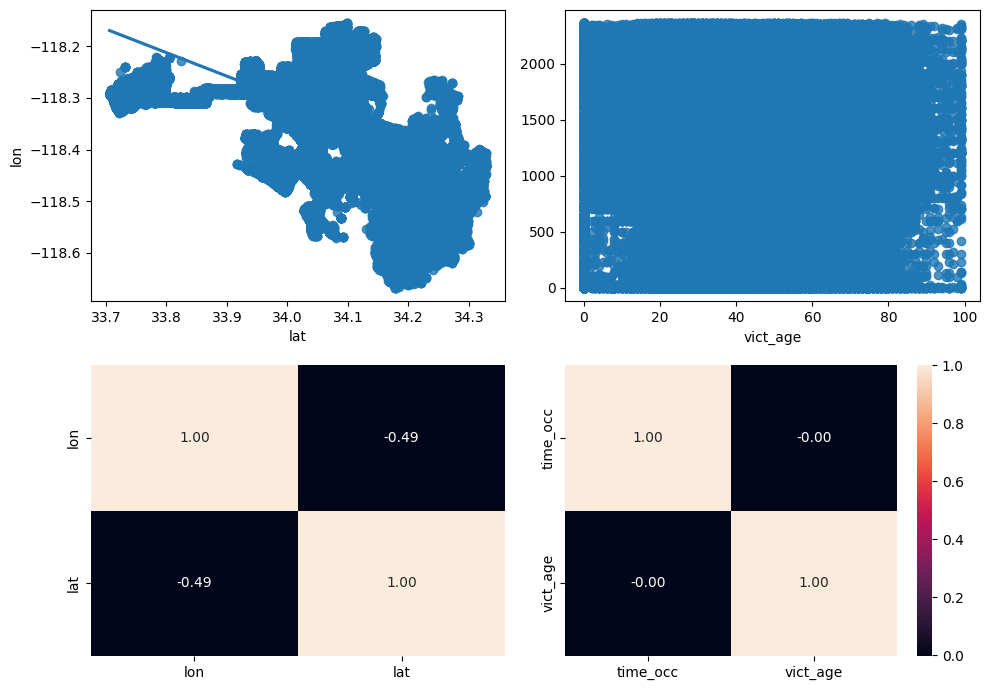

In [101]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "lat", y = "lon")
sns.heatmap(total_data[["lon", "lat"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "vict_age", y = "time_occ").set(ylabel=None)
sns.heatmap(total_data[["time_occ", "vict_age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

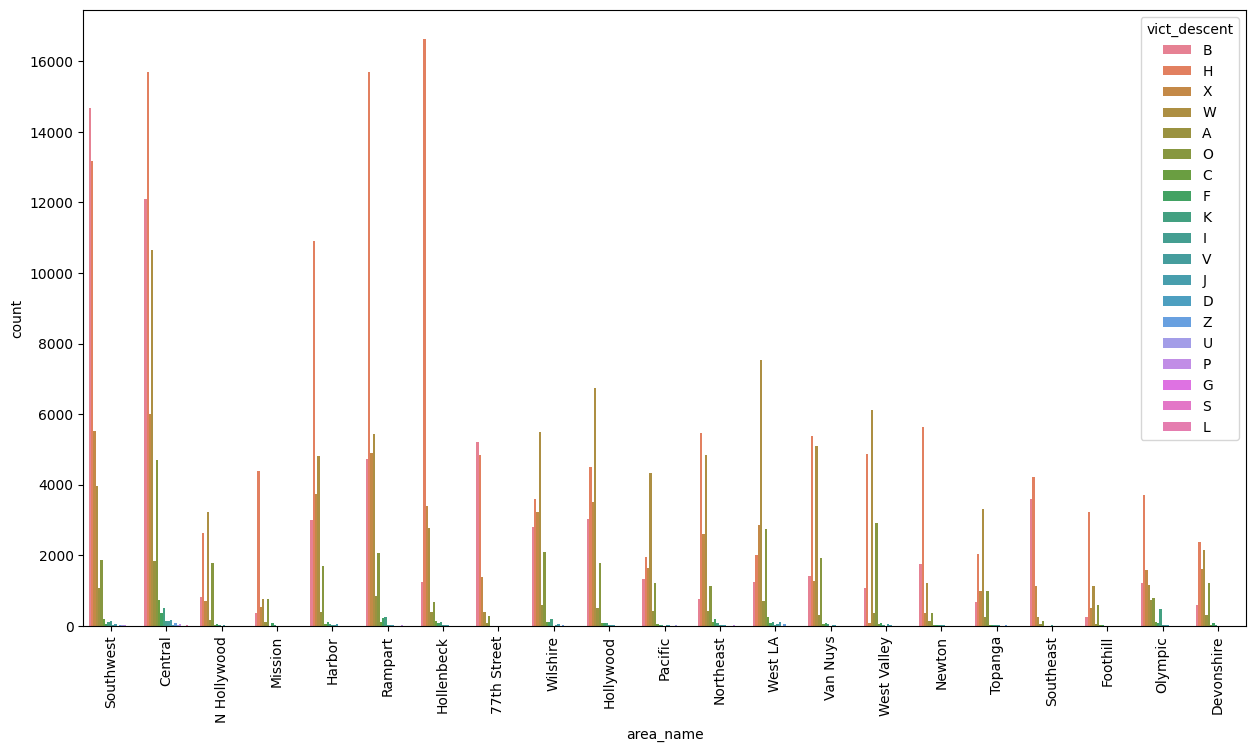

In [102]:
plt.figure(figsize=(15, 8))
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_descent")
plt.tick_params(axis = "x", labelrotation=90)
# Show the plot
plt.show()

## Feature engineering

In [103]:
total_data["weapon_desc"].fillna("No weapon register", inplace = True)
total_data["weapon_desc"] 

0         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1                            UNKNOWN WEAPON/OTHER WEAPON
2                                     No weapon register
3                                     No weapon register
4                                     No weapon register
                               ...                      
373872                                No weapon register
373873                                No weapon register
373874    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
373875                                No weapon register
373876                                No weapon register
Name: weapon_desc, Length: 373877, dtype: object

In [104]:
total_data = total_data.reset_index(drop=True)

In [105]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373877 entries, 0 to 373876
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      373877 non-null  datetime64[ns]
 1   time_occ      373877 non-null  int64         
 2   area_name     373877 non-null  object        
 3   rpt_dist_no   373877 non-null  int64         
 4   crm_cd_desc   373877 non-null  object        
 5   mocodes       373877 non-null  object        
 6   vict_age      373877 non-null  int64         
 7   vict_sex      373757 non-null  object        
 8   vict_descent  373757 non-null  object        
 9   premis_desc   373597 non-null  object        
 10  weapon_desc   373877 non-null  object        
 11  status_desc   373877 non-null  object        
 12  location      373877 non-null  object        
 13  lat           373877 non-null  float64       
 14  lon           373877 non-null  float64       
 15  weekday       373

In [106]:
total_data["vict_sex"].fillna("X", inplace = True)
total_data["vict_descent"].fillna("X", inplace = True)

In [107]:
total_data.dropna(subset=["premis_desc"], inplace = True, ignore_index = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373597 entries, 0 to 373596
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      373597 non-null  datetime64[ns]
 1   time_occ      373597 non-null  int64         
 2   area_name     373597 non-null  object        
 3   rpt_dist_no   373597 non-null  int64         
 4   crm_cd_desc   373597 non-null  object        
 5   mocodes       373597 non-null  object        
 6   vict_age      373597 non-null  int64         
 7   vict_sex      373597 non-null  object        
 8   vict_descent  373597 non-null  object        
 9   premis_desc   373597 non-null  object        
 10  weapon_desc   373597 non-null  object        
 11  status_desc   373597 non-null  object        
 12  location      373597 non-null  object        
 13  lat           373597 non-null  float64       
 14  lon           373597 non-null  float64       
 15  weekday       373

In [108]:
total_data = total_data.loc[total_data["vict_age"] > 0]
total_data = total_data.reset_index()

In [109]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         320504 non-null  int64         
 1   date_occ      320504 non-null  datetime64[ns]
 2   time_occ      320504 non-null  int64         
 3   area_name     320504 non-null  object        
 4   rpt_dist_no   320504 non-null  int64         
 5   crm_cd_desc   320504 non-null  object        
 6   mocodes       320504 non-null  object        
 7   vict_age      320504 non-null  int64         
 8   vict_sex      320504 non-null  object        
 9   vict_descent  320504 non-null  object        
 10  premis_desc   320504 non-null  object        
 11  weapon_desc   320504 non-null  object        
 12  status_desc   320504 non-null  object        
 13  location      320504 non-null  object        
 14  lat           320504 non-null  float64       
 15  lon           320

In [110]:
codigos = pd.read_csv("../data/raw/mo_codes_data.csv")
codigos

,REV: 07/19
0,0100 Suspect Impersonate
1,0101 Aid victim
2,0102 Blind
3,0103 Physically disabled
4,0104 Customer
...,...
858,4025 T/C - South Traffic (STD)
859,4026 T/C - Valley Traffic (VTD)
860,4027 T/C - West Traffic (WTD)TRAFFIC COLLISION...
861,NUMERICAL


In [111]:
codigos["mocodes"] = codigos["REV: 07/19"].str[:4]
codigos["mocodes_desc"] = codigos["REV: 07/19"].str[4:]
codigos

,REV: 07/19,mocodes,mocodes_desc
0,0100 Suspect Impersonate,0100,Suspect Impersonate
1,0101 Aid victim,0101,Aid victim
2,0102 Blind,0102,Blind
3,0103 Physically disabled,0103,Physically disabled
4,0104 Customer,0104,Customer
...,...,...,...
858,4025 T/C - South Traffic (STD),4025,T/C - South Traffic (STD)
859,4026 T/C - Valley Traffic (VTD),4026,T/C - Valley Traffic (VTD)
860,4027 T/C - West Traffic (WTD)TRAFFIC COLLISION...,4027,T/C - West Traffic (WTD)TRAFFIC COLLISION (C...
861,NUMERICAL,NUME,RICAL


In [112]:
codigos.drop("REV: 07/19", axis = 1, inplace = True)
codigos.reset_index(drop=True, inplace=True)
codigos.head()

,mocodes,mocodes_desc
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer


In [113]:
codigos = codigos[~codigos['mocodes'].str.contains(r'[a-zA-Z- ]')]
codigos.head()

,mocodes,mocodes_desc
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer


In [114]:
codigos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 860
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mocodes       824 non-null    object
 1   mocodes_desc  824 non-null    object
dtypes: object(2)
memory usage: 19.3+ KB


In [115]:
total_data["mocodes_desc"]=total_data['mocodes']
total_data["mocodes_desc"].head()

0                [0444, 0913]
1          [0416, 1822, 1414]
2                [0329, 1402]
3                      [0329]
4    [0413, 1822, 1262, 1415]
Name: mocodes_desc, dtype: object

In [116]:
total_data["mocodes_desc"] = total_data["mocodes_desc"].apply(lambda x: sorted(x))
total_data["mocodes_desc"].head(5)

0                [0444, 0913]
1          [0416, 1414, 1822]
2                [0329, 1402]
3                      [0329]
4    [0413, 1262, 1415, 1822]
Name: mocodes_desc, dtype: object

In [117]:
total_data["mocodes_desc"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 320504 entries, 0 to 320503
Series name: mocodes_desc
Non-Null Count   Dtype 
--------------   ----- 
320504 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [118]:
codigos_dict = dict(zip(codigos["mocodes"], codigos["mocodes_desc"]))

for idx, code_list in enumerate(total_data["mocodes_desc"]):
    for i, code in enumerate(code_list):
        if code in codigos_dict:
            total_data.at[idx, "mocodes_desc"][i] = codigos_dict[code].lower()

total_data["mocodes_desc"].head()

0                      [ pushed,  victim knew suspect]
1        [ hit-hit w/ weapon,  photographs,  stranger]
2          [ vandalized,  evidence booked (any crime)]
3                                        [ vandalized]
4    [ drugged,  raped while unconscious,  rape kit...
Name: mocodes_desc, dtype: object

In [119]:
total_data["mocodes_desc"] = total_data["mocodes_desc"].apply(lambda x: "".join(x))
total_data["mocodes_desc"].head()

0                           pushed victim knew suspect
1               hit-hit w/ weapon photographs stranger
2               vandalized evidence booked (any crime)
3                                           vandalized
4     drugged raped while unconscious rape kit stra...
Name: mocodes_desc, dtype: object

In [120]:
def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

# Applying a function to preprocess the text
total_data["mocodes_desc"] = total_data["mocodes_desc"].apply(preprocess_text)
total_data["mocodes_desc"].head()

0                      [pushed, victim, knew, suspect]
1            [hit, hit, weapon, photographs, stranger]
2           [vandalized, evidence, booked, any, crime]
3                                         [vandalized]
4    [drugged, raped, while, unconscious, rape, kit...
Name: mocodes_desc, dtype: object

In [121]:
total_data["mocodes_desc"] = total_data["mocodes_desc"].apply(lambda x: " ".join(x))
total_data["mocodes_desc"].head

<bound method NDFrame.head of 0                                pushed victim knew suspect
1                       hit hit weapon photographs stranger
2                      vandalized evidence booked any crime
3                                                vandalized
4         drugged raped while unconscious rape kit stranger
                                ...                        
320499    removes vict property vehicle involved breaks ...
320500      indecent exposure suspect is homeless transient
320501    grabbed victim knew suspect susp is was curren...
320502                       removes vict property stranger
320503    removes vict property suspect removed parts fr...
Name: mocodes_desc, Length: 320504, dtype: object>

In [122]:
len(total_data["mocodes_desc"].unique())

103841

In [123]:
total_data.drop("index", axis = 1, inplace = True)
total_data.head()

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,"[0444, 0913]",36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978,Wednesday,January,pushed victim knew suspect
1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,"[0416, 1822, 1414]",25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545,Wednesday,January,hit hit weapon photographs stranger
2,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),"[0329, 1402]",76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No weapon register,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,Wednesday,January,vandalized evidence booked any crime
3,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",[0329],31,X,X,BEAUTY SUPPLY STORE,No weapon register,Invest Cont,14400 TITUS ST,34.2198,-118.4468,Wednesday,January,vandalized
4,2020-01-01,30,Central,163,"RAPE, FORCIBLE","[0413, 1822, 1262, 1415]",25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY,34.0452,-118.2534,Wednesday,January,drugged raped while unconscious rape kit stranger


In [124]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      320504 non-null  datetime64[ns]
 1   time_occ      320504 non-null  int64         
 2   area_name     320504 non-null  object        
 3   rpt_dist_no   320504 non-null  int64         
 4   crm_cd_desc   320504 non-null  object        
 5   mocodes       320504 non-null  object        
 6   vict_age      320504 non-null  int64         
 7   vict_sex      320504 non-null  object        
 8   vict_descent  320504 non-null  object        
 9   premis_desc   320504 non-null  object        
 10  weapon_desc   320504 non-null  object        
 11  status_desc   320504 non-null  object        
 12  location      320504 non-null  object        
 13  lat           320504 non-null  float64       
 14  lon           320504 non-null  float64       
 15  weekday       320

In [125]:
total_data.drop("mocodes", axis = 1, inplace = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      320504 non-null  datetime64[ns]
 1   time_occ      320504 non-null  int64         
 2   area_name     320504 non-null  object        
 3   rpt_dist_no   320504 non-null  int64         
 4   crm_cd_desc   320504 non-null  object        
 5   vict_age      320504 non-null  int64         
 6   vict_sex      320504 non-null  object        
 7   vict_descent  320504 non-null  object        
 8   premis_desc   320504 non-null  object        
 9   weapon_desc   320504 non-null  object        
 10  status_desc   320504 non-null  object        
 11  location      320504 non-null  object        
 12  lat           320504 non-null  float64       
 13  lon           320504 non-null  float64       
 14  weekday       320504 non-null  object        
 15  month         320

In [126]:
str_columns=total_data.select_dtypes(include='object').columns
str_columns

Index(['area_name', 'crm_cd_desc', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'weekday', 'month',
       'mocodes_desc'],
      dtype='object')

In [127]:
columnas_factorizadas = {i: dict(zip(total_data[i], pd.factorize(total_data[i])[0])) for i in str_columns}


In [128]:
resultados_json = pd.Series(columnas_factorizadas).to_json(indent=2)

with open('../data/interim/fact.json', 'w') as file:
    file.write(resultados_json)

In [129]:
for i in str_columns:
    total_data[i]=pd.factorize(total_data[i])[0]

In [130]:
total_data.head()

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,377,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,163,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1543,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,1998,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,163,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [131]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      320504 non-null  datetime64[ns]
 1   time_occ      320504 non-null  int64         
 2   area_name     320504 non-null  int64         
 3   rpt_dist_no   320504 non-null  int64         
 4   crm_cd_desc   320504 non-null  int64         
 5   vict_age      320504 non-null  int64         
 6   vict_sex      320504 non-null  int64         
 7   vict_descent  320504 non-null  int64         
 8   premis_desc   320504 non-null  int64         
 9   weapon_desc   320504 non-null  int64         
 10  status_desc   320504 non-null  int64         
 11  location      320504 non-null  int64         
 12  lat           320504 non-null  float64       
 13  lon           320504 non-null  float64       
 14  weekday       320504 non-null  int64         
 15  month         320

## Correlation analysis

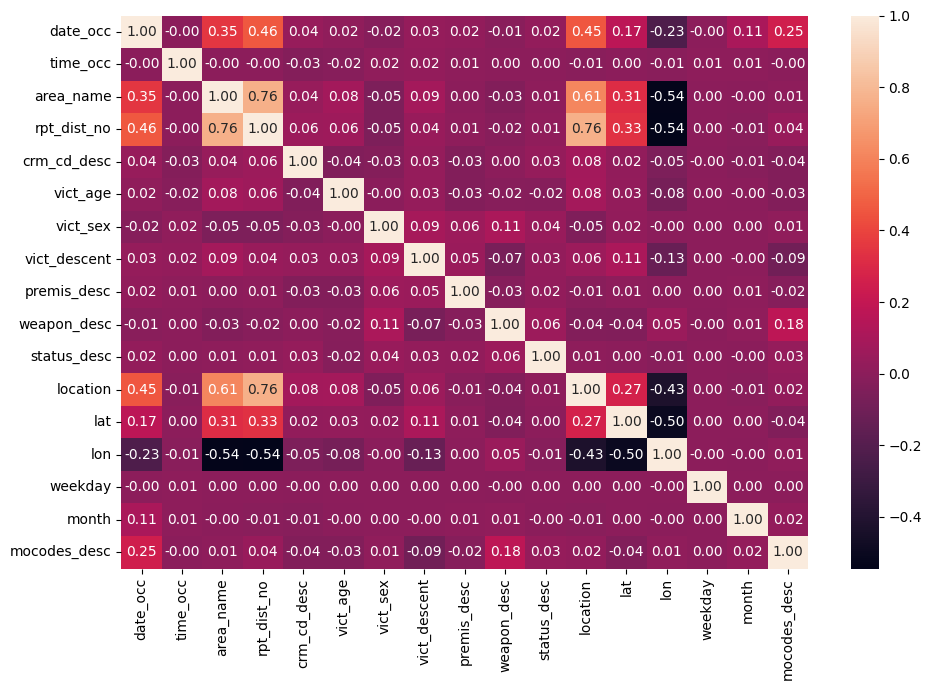

In [132]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [133]:
total_data.drop("rpt_dist_no", axis = 1, inplace = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      320504 non-null  datetime64[ns]
 1   time_occ      320504 non-null  int64         
 2   area_name     320504 non-null  int64         
 3   crm_cd_desc   320504 non-null  int64         
 4   vict_age      320504 non-null  int64         
 5   vict_sex      320504 non-null  int64         
 6   vict_descent  320504 non-null  int64         
 7   premis_desc   320504 non-null  int64         
 8   weapon_desc   320504 non-null  int64         
 9   status_desc   320504 non-null  int64         
 10  location      320504 non-null  int64         
 11  lat           320504 non-null  float64       
 12  lon           320504 non-null  float64       
 13  weekday       320504 non-null  int64         
 14  month         320504 non-null  int64         
 15  mocodes_desc  320

In [134]:
total_data.to_csv("../data/processed/final_data.csv", index=False)

# Hasta aqui

"RAPE, FORCIBLE" 
"RAPE, ATTEMPTED"
"CRIMINAL HOMICIDE"


In [135]:
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(total_data["mocodes_desc"]).toarray()

# X[:5]

In [136]:
# total_data["area_name"] = pd.factorize(total_data["area_name"])[0]
# total_data["crm_cd_desc"] = pd.factorize(total_data["crm_cd_desc"])[0]
# total_data["vict_sex"] = pd.factorize(total_data["vict_sex"])[0]
# total_data["vict_descent"] = pd.factorize(total_data["vict_descent"])[0]
# total_data["premis_desc"] = pd.factorize(total_data["premis_desc"])[0]
# total_data["weapon_desc"] = pd.factorize(total_data["weapon_desc"])[0]
# total_data["status_desc"] = pd.factorize(total_data["status_desc"])[0]
# total_data["location"] = pd.factorize(total_data["location"])[0]

# fig, axis = plt.subplots(figsize = (10, 6))
# sns.heatmap(total_data[['area_name', 'crm_cd_desc', 'vict_sex', 'vict_descent',
#        'premis_desc', 'weapon_desc', 'status_desc', 'location']].corr(), annot = True, fmt = ".2f")
# plt.tight_layout()
# plt.show()

In [137]:
# # Contar el número total de crímenes por área
# total_crimes_by_area = total_data.groupby('area_name')['crm_cd_desc'].count().reset_index()
# total_crimes_by_area.columns = ['area_name', 'total_crimes']

# # Contar el número de crímenes específicos (puedes ajustar esto según tus necesidades)
# specific_crime_count_by_area = total_data.groupby(['area_name', 'crm_cd_desc']).size().reset_index(name='crime_count')

# # Unir los dos conjuntos de datos
# merged_total_data = pd.merge(total_crimes_by_area, specific_crime_count_by_area, on='area_name')

# # Calcular el porcentaje de crímenes por área
# merged_total_data['crime_percentage'] = (merged_total_data['crime_count'] / merged_total_data['total_crimes']) * 100

# # Encontrar el tipo de crimen con el mayor porcentaje por área
# max_crime_by_area = merged_total_data.loc[merged_total_data.groupby('area_name')['crime_percentage'].idxmax()]

# # Mostrar el resultado
# print(max_crime_by_area[['area_name', 'crm_cd_desc', 'crime_percentage']])

<!-- fig, axis = plt.subplots(2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0], data = total_data, x = "vict_age", y = "time_occ")
sns.heatmap(total_data[["vict_age", "time_occ"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show() -->